#Introduction

.....


Check to see if jupyter lab uses the correct python interpreter with '!which python'.
It should be something like '/opt/anaconda3/envs/[environment name]/bin/python' (on Mac).
If not, try this: https://github.com/jupyter/notebook/issues/3146#issuecomment-352718675

In [2]:
!which python

'which' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


# Install dependencies:

In [3]:
install_packages = True
if install_packages:
    !conda install tensorflow=2 -y
    print("tensorflow installed")
    !conda install -c anaconda pandas -y
    print("pandas installed")
    !conda install -c conda-forge tensorflow-hub -y
    print("tensorflow-hub installed")
    !conda install -c akode html2text -y
    print("html2text installed")
    !conda install -c conda-forge tqdm -y
    print("tqdm installed")
    !conda install -c anaconda scikit-learn -y
    print("scikit-learn  installed")
    !conda install -c conda-forge matplotlib -y
    print("matplotlib installed")
    !conda install -c anaconda seaborn -y
    print("seaborn installed")

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\xinyu\anaconda3\envs\Seminar_csma

  added / updated specs:
    - tensorflow=2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.2.0        |            eigen           3 KB
    absl-py-0.11.0             |   py36haa95532_0         192 KB
    aiohttp-3.6.3              |   py36he774522_0         512 KB
    astor-0.8.1                |           py36_0          47 KB
    async-timeout-3.0.1        |           py36_0          12 KB
    blinker-1.4                |           py36_0          22 KB
    ca-certificates-2020.10.14 |                0         122 KB
    c


PackagesNotFoundError: The following packages are not available from current channels:

  - html2text

Current channels:

  - https://conda.anaconda.org/akode/win-64
  - https://conda.anaconda.org/akode/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\xinyu\anaconda3\envs\Seminar_csma

  added / updated specs:
    - tqdm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tqdm-4.54.0                |     pyhd8ed1ab_0          54 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          54 KB

The following NEW packages will be INSTALLED:

  tqdm               conda-forge/noarch::tqdm-4.54.0-pyhd8ed1ab_0




tqdm-4.54.0          | 54 KB     |            |   0% 
tqdm-4.54.0          | 54 KB     | ##9        |  30% 
tqdm-4.54.0          | 54 KB     | ########## | 100% 
tqdm-4.54.0          | 54 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
tqdm installed
Solvin

# Imports

In [3]:
#imports
import pandas as pd
import numpy as np
import os
import time
import tensorflow as tf
import tensorflow_hub as hub
import zipfile
#from html2text import HTML2Text
from tqdm import tqdm
import re
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#!conda install asmeurer html2text

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - html2text
  - asmeurer

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [1]:
from html2text import HTML2Text

# Set pandas print options
This will improve readability of printed pandas dataframe.


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Set global Parameters
Set your parameters here:

data_path: In this path put the data you have downloaded with YouTube Data Tools. 
output_path: Tghe files generated in this notebook will be saved here.

url_dict: URLs to models on Tensorflow hub are saved here. Other models are available there.
model_type: Define which model you would like to use. Choose one from url_dict

new_embeddings: If this is true, new embeddings will be generated and saved at output_path. Otherwise, embeddings are loaded from Disc.




In [11]:
data_path = './data/videoinfo__lslIyHo6zg_2020_12_01-14_50_09_comments.tab'
output_path = "./output/"

new_embeddings = True

url_dict = {
            'Transformer' : "https://tfhub.dev/google/universal-sentence-encoder-large/5",
            'DAN' : "https://tfhub.dev/google/universal-sentence-encoder/4",
            'Transformer_Multilingual': "https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"
}

model_type = 'Transformer' #@param ['DAN','Transformer','Transformer_Multilingual']

## Create output directory
Try to create the directory defined by output_path

In [6]:
try:
   os.mkdir(output_path)
except OSError:
  print ("Creation of the directory %s failed" % output_path)
else:
  print ("Successfully created the directory %s " % output_path)


Successfully created the directory ./output/ 


# Load Data
Load you data as a pandas dataframe

In [12]:
if new_embeddings:
    data = pd.read_csv(data_path,sep='\t',header=(0))
    data.head()

In [13]:
data.head()

,id,replyCount,likeCount,publishedAt,authorName,text,authorChannelId,authorChannelUrl,isReply,isReplyTo,isReplyToName
0,Ugw2FmdFawVtLSxeqH14AaABAg,0.0,0,2020-11-14 11:29:17,Dr Deadbeat,We had to watch this at university (in the UK) and discuss it as if the whole thing was fact,UC_3nTK5UGdpuUyP2LpKPwUg,http://www.youtube.com/channel/UC_3nTK5UGdpuUyP2LpKPwUg,0,NaN,NaN
1,UgyF6H8BEBmq_tjStV54AaABAg,0.0,0,2020-10-24 11:58:51,Bertie Blue,"There is no context in science for hiding data. <br /><br />Genuine scientists would say &quot;we need to EXPLAIN the decline&quot; politically motivated cranks say &quot;hide the decline&quot; it is a matter of record the disgusting approach pseudoscience climate researchers took.<br /><br />What a waste of public monies this science bereft fraud of man made dangerous climate is, I might add the official censorship of skeptics by the BBC is reason enough to rescind the licence fee we shouldn&#39;t be paying for propaganda",UCGyI5Vb4RPWfeWdBtlPgRbw,http://www.youtube.com/channel/UCGyI5Vb4RPWfeWdBtlPgRbw,0,NaN,NaN
2,UgzZbPu3MawUcSKv0DN4AaABAg,0.0,0,2020-10-15 15:37:54,Spegger,"Again, no mention what on earth even is on the climate accord. People read it, it&#39;s a complete fraud! These people are professional liars and crooks, don&#39;t listen to their tyranny! BBC is an enemy of the people.",UCXwjB_hbrtvkziV9hSJXurw,http://www.youtube.com/channel/UCXwjB_hbrtvkziV9hSJXurw,0,NaN,NaN
3,UgwknRpMHXakUdczG6l4AaABAg,0.0,0,2020-09-27 05:21:21,SpraYeRS77,Was this piece sponsored by Al Gore?,UCCPAAc81GLDSYsAQI23af-w,http://www.youtube.com/channel/UCCPAAc81GLDSYsAQI23af-w,0,NaN,NaN
4,UgzQlz7VWrJamXgN6mF4AaABAg,0.0,0,2020-08-26 00:46:38,James Esselman,"That&#39;s right.... Us skeptics are really tricky. I admit it. What the BBC found out that they didn&#39;t reveal in this video is that us skeptics brainwashed Michael Mann and Phil Jones into acting like crooks through thought induction. We do this through channeling thought waves through a Ouija board. The average person when reading the Climategate E-mails would believe that Michael Mann and Phil Jones are dishonest crooks but they really aren&#39;t. It was our evil plan to make them look like totally dishonest, morally corrupt, climate assholes.... IT WAS US TRICKY CLIMATE CHANGE DENIERS AND OUR TRICKY TRICKINESS !.... I feel better now that I have come clean and I thank the always honest BBC for not relaying my criminal behavior to the police.",UCdKu7f4_xvDk76cBywWEYqA,http://www.youtube.com/channel/UCdKu7f4_xvDk76cBywWEYqA,0,NaN,NaN


# Preprocessing
Preprocess your data:
- Drop empty rows
- Drop unused columns

In [14]:
if new_embeddings:
    data = data.dropna(subset=['text', 'authorName']) # drop rows with no content
    data=data.drop(['id', 'replyCount','likeCount','authorChannelUrl','authorChannelId','isReplyTo','isReplyToName'],axis=1) # drop unused columns
    data.head()

- remove HTML-tags, links and usernames

In [15]:
if new_embeddings:
    # Remove HTML tags
    tqdm.pandas()
    h = HTML2Text()
    h.ignore_links = True
    data['cleaned'] = data['text'].progress_apply(lambda x: h.handle(x))
    print( "Removed HTML Tags.")

    # Remove links
    http_link_pattern = r'http\S+'
    bitly_link_pattern = r'bit.ly/\S+'
    data['cleaned'] = data['cleaned'].str.replace(http_link_pattern, '')
    data['cleaned'] = data['cleaned'].str.replace(bitly_link_pattern, '')
    print( "Removed Links.")

    # Remove user names
    keep_names = ["earth", "Tide", "Geologist", "A Person", "Titanic", "adventure", "Sun", "The United States Of America"] # user names we want to keep
    user_names = [name for name in data['authorName'].unique() if (len(name)> 3 and name not in keep_names)]
    data['cleaned'] = data['cleaned'].str.replace('|'.join(map(re.escape, user_names)), '')
    print( "Removed user names.")

100%|██████████████████████████████████████████████████████████████████████████████| 426/426 [00:00<00:00, 2349.81it/s]

Removed HTML Tags.
Removed Links.
Removed user names.


# Save or Load preprocessed data

Save your data afte preprocessing, or load preprocessed data from disc.

In [16]:
if new_embeddings:
  data.to_pickle(output_path+'data_preprocessed'+'.pkl')
else:
  data = pd.read_pickle(output_path+'data_preprocessed'+'.pkl')
data.head()

,publishedAt,authorName,text,isReply,cleaned
0,2020-11-14 11:29:17,Dr Deadbeat,We had to watch this at university (in the UK) and discuss it as if the whole thing was fact,0,We had to watch this at university (in the UK) and discuss it as if the whole\nthing was fact\n\n
1,2020-10-24 11:58:51,Bertie Blue,"There is no context in science for hiding data. <br /><br />Genuine scientists would say &quot;we need to EXPLAIN the decline&quot; politically motivated cranks say &quot;hide the decline&quot; it is a matter of record the disgusting approach pseudoscience climate researchers took.<br /><br />What a waste of public monies this science bereft fraud of man made dangerous climate is, I might add the official censorship of skeptics by the BBC is reason enough to rescind the licence fee we shouldn&#39;t be paying for propaganda",0,"There is no context in science for hiding data. \n \nGenuine scientists would say ""we need to EXPLAIN the decline"" politically\nmotivated cranks say ""hide the decline"" it is a matter of record the\ndisgusting approach pseudoscience climate researchers took. \n \nWhat a waste of public monies this science bereft fraud of man made dangerous\nclimate is, I might add the official censorship of skeptics by the BBC is\nreason enough to rescind the licence fee we shouldn't be paying for propaganda\n\n"
2,2020-10-15 15:37:54,Spegger,"Again, no mention what on earth even is on the climate accord. People read it, it&#39;s a complete fraud! These people are professional liars and crooks, don&#39;t listen to their tyranny! BBC is an enemy of the people.",0,"Again, no mention what on earth even is on the climate accord. People read it,\nit's a complete fraud! These people are professional liars and crooks, don't\nlisten to their tyranny! BBC is an enemy of the people.\n\n"
3,2020-09-27 05:21:21,SpraYeRS77,Was this piece sponsored by Al Gore?,0,Was this piece sponsored by Al Gore?\n\n
4,2020-08-26 00:46:38,James Esselman,"That&#39;s right.... Us skeptics are really tricky. I admit it. What the BBC found out that they didn&#39;t reveal in this video is that us skeptics brainwashed Michael Mann and Phil Jones into acting like crooks through thought induction. We do this through channeling thought waves through a Ouija board. The average person when reading the Climategate E-mails would believe that Michael Mann and Phil Jones are dishonest crooks but they really aren&#39;t. It was our evil plan to make them look like totally dishonest, morally corrupt, climate assholes.... IT WAS US TRICKY CLIMATE CHANGE DENIERS AND OUR TRICKY TRICKINESS !.... I feel better now that I have come clean and I thank the always honest BBC for not relaying my criminal behavior to the police.",0,"That's right.... Us skeptics are really tricky. I admit it. What the BBC found\nout that they didn't reveal in this video is that us skeptics brainwashed\nMichael Mann and Phil Jones into acting like crooks through thought induction.\nWe do this through channeling thought waves through a Ouija board. The average\nperson when reading the Climategate E-mails would believe that Michael Mann\nand Phil Jones are dishonest crooks but they really aren't. It was our evil\nplan to make them look like totally dishonest, morally corrupt, climate\nassholes.... IT WAS US TRICKY CLIMATE CHANGE DENIERS AND OUR TRICKY TRICKINESS\n!.... I feel better now that I have come clean and I thank the always honest\nBBC for not relaying my criminal behavior to the police.\n\n"


# Produce Text Embeddings with Universal Sentence Encoder

## Load Model
Load the model from TF-hub

In [17]:
hub_url = url_dict[model_type]
if new_embeddings:
  print("Loading model. This will take some time...")
  embed = hub.load(hub_url)

Loading model. This will take some time...


## Embed Documents
Produce embeddings of your documents.

In [19]:
if new_embeddings:
    for k,g in data.groupby(np.arange(len(data))//200):
        if k == 0:
            embeddings = embed(g['cleaned'])
        else:
            embeddings_new = embed(g['cleaned'])
            embeddings = tf.concat(values=[embeddings,embeddings_new],axis = 0)
            print(k , end =" ")
    print("The embeddings vector is of fixed length {}".format(embeddings.shape[1]))

    np.save(output_path+'/embeddings'+model_type+'.npy', embeddings, allow_pickle=True, fix_imports=True)
else:
    embeddings = np.load(output_path+'/embeddings'+model_type+'.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

embeddings.shape

1 2 The embeddings vector is of fixed length 512


TensorShape([426, 512])

## Calculate Similarity Matrix with angular distance

'Following Cer et al. (2018), we first compute
the sentence embeddings u, v for an STS sentence
pair, and then score the sentence pair similarity
based on the angular distance between the two
embedding vectors  d = − arccos (uv/||u|| ||v||).'

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
def cos_sim(input_vectors):
    similarity = cosine_similarity(input_vectors)
    return similarity
cosine_similarity_matrix = cos_sim(np.array(embeddings))
print(cosine_similarity_matrix)

[[ 1.0000001   0.17476888  0.2832076  ...  0.12817577  0.1223225
   0.08649181]
 [ 0.17476888  0.99999994  0.44149414 ...  0.1828466   0.2308078
  -0.03353097]
 [ 0.2832076   0.44149414  1.0000002  ...  0.2704749   0.3316369
  -0.0141933 ]
 ...
 [ 0.12817577  0.1828466   0.2704749  ...  1.          0.5238452
   0.02373179]
 [ 0.1223225   0.2308078   0.3316369  ...  0.5238452   1.0000002
   0.03558647]
 [ 0.08649181 -0.03353097 -0.0141933  ...  0.02373179  0.03558647
   0.99999994]]


# Plots Similarity 
Plot and print a heat map showing the semantic contextual similarity between comments.

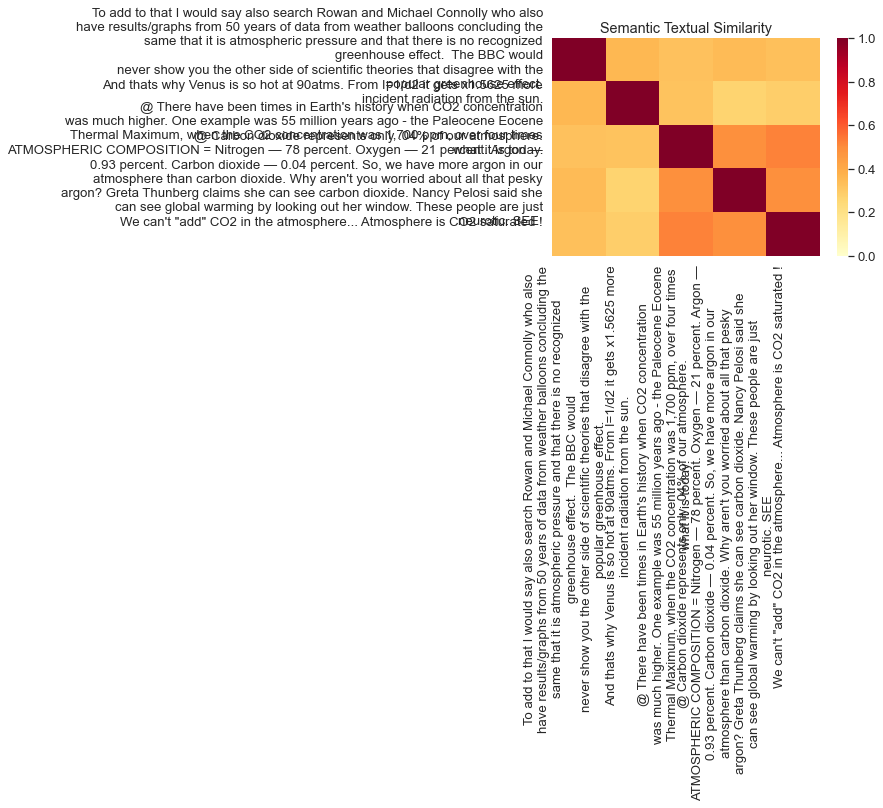

In [24]:
import seaborn as sns
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

num_samples = 5
off_set = 100

plot_similarity(data.iloc[off_set:off_set+num_samples]['cleaned'], embeddings[off_set:off_set+num_samples], 90)

# Show neighbours of a comment 
Define which comment to analyze

In [25]:
comment_index = 324
comment = data["cleaned"][comment_index]
comment_list = data["cleaned"].tolist()
print(comment)

 Thank you for your kind words. Its tricky at times. I was listening
to Morrissey the other night. He’s is such a kind soul who is vilified by so
many people theses days. I cant help but feel they are wrong about him.




Print similar comments.

In [26]:
def get_top_similar(sentence, sentence_list, similarity_matrix, topN):
    # find the index of sentence in list
    index = sentence_list.index(sentence)
    # get the corresponding row in similarity matrix
    similarity_row = np.array(similarity_matrix[index, :])
    # get the indices of top similar
    indices = similarity_row.argsort()[-topN:][::-1]
    return [sentence_list[i] for i in indices]


for i, value in enumerate(get_top_similar(comment, comment_list, cosine_similarity_matrix, 20)):
  print("Top similar comment {}: {}".format(i+1, value))

Top similar comment 1:  Thank you for your kind words. Its tricky at times. I was listening
to Morrissey the other night. He’s is such a kind soul who is vilified by so
many people theses days. I cant help but feel they are wrong about him.


Top similar comment 2: Then again it wouldn’t be like Travis Bickle to be embittered in anyway and
instead of engaging with public issues like this with an open and reasonable
mind just go about thinking your so righteous and heroic for being a cynic on
the sideline


Top similar comment 3: @ And many more people who are much better informed than you or
I disagree with those people and you. Sorry to beak it to you, but the best
analysis of the best information proves you wrong. I'm not an expert on
anything, sadly. But at least I have the humility to accept the best
information available..


Top similar comment 4: Well said. I think it fair to add that I'm on the opposite side of the
spectrum to the moron on the street. the issues are complex, ind